**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**STEP 1: Load the Dataset**

In [3]:
# Load dataset
column_names = [
    'ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
    'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
    'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
]

# Load the file
df = pd.read_csv('/content/cancer-wisconsin.data.txt', names=column_names)


**STEP 2: Exploratory Data Analysis (EDA)**

In [4]:
# Preview the dataset
print(df.head())


        ID  Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   
3  1016277                6                     8                      8   
4  1017023                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1

In [5]:
# Dataset shape
print("Shape of dataset:", df.shape)

Shape of dataset: (699, 11)


In [6]:
# Check data types
print(df.dtypes)

ID                              int64
Clump_Thickness                 int64
Uniformity_Cell_Size            int64
Uniformity_Cell_Shape           int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [7]:
# Convert 'Bare_Nuclei' to numeric, handle '?'
df['Bare_Nuclei'].replace('?', np.nan, inplace=True)
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype('float')
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median(), inplace=True)

# Drop ID column (not useful)
df.drop('ID', axis=1, inplace=True)



/tmp/ipython-input-7-4075873027.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bare_Nuclei'].replace('?', np.nan, inplace=True)
/tmp/ipython-input-7-4075873027.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [8]:
# Check nulls
print(df.isnull().sum())


Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [10]:
# Summary statistics
print(df.describe())

# Class distribution
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True) * 100)


       Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count       699.000000            699.000000             699.000000   
mean          4.417740              3.134478               3.207439   
std           2.815741              3.051459               2.971913   
min           1.000000              1.000000               1.000000   
25%           2.000000              1.000000               1.000000   
50%           4.000000              1.000000               1.000000   
75%           6.000000              5.000000               5.000000   
max          10.000000             10.000000              10.000000   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count         699.000000                   699.000000   699.000000   
mean            2.806867                     3.216023     3.486409   
std             2.855379                     2.214300     3.621929   
min             1.000000                     1.000000     1.000000   
25%       

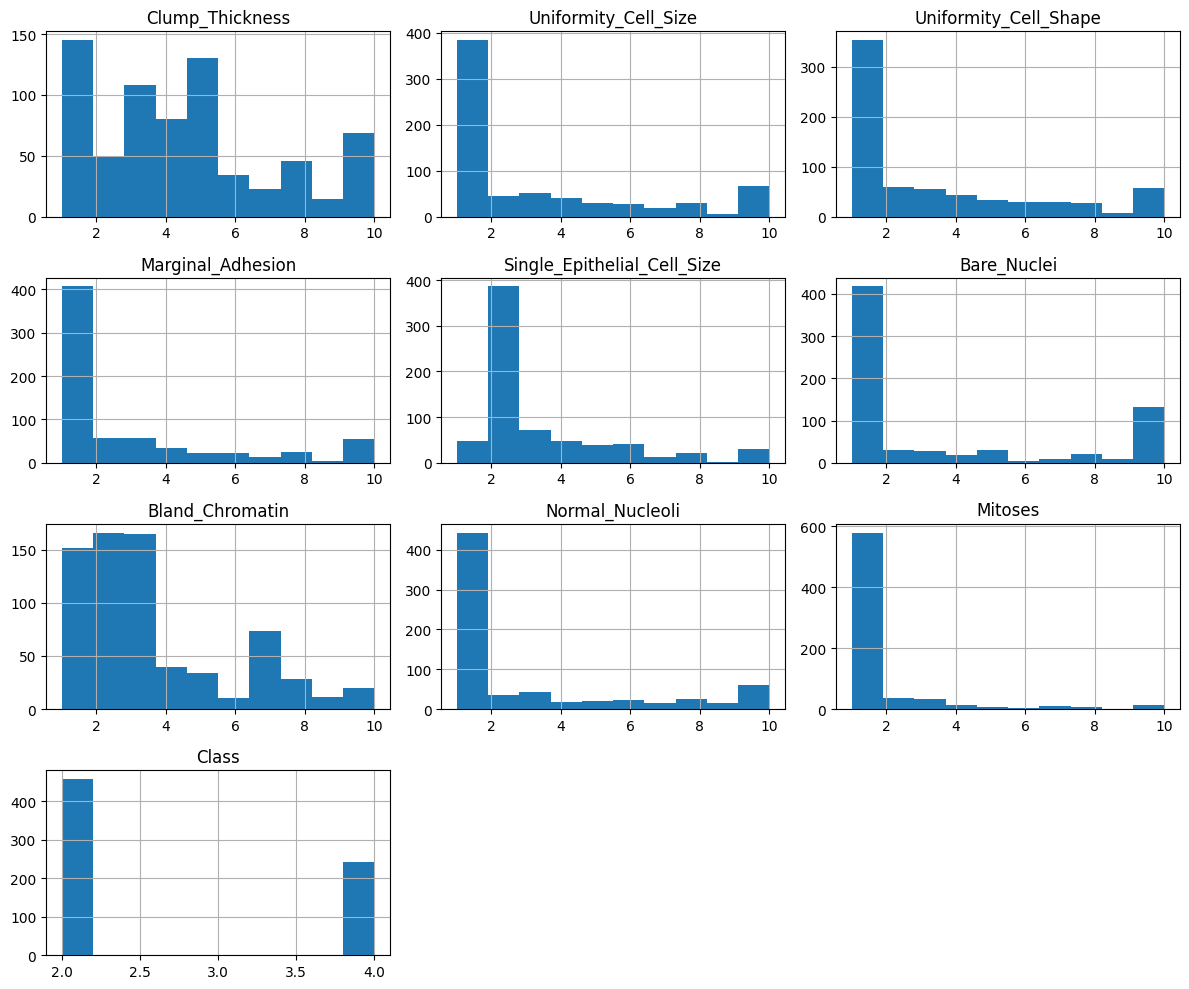

In [11]:
# Histograms
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

**STEP 3: Define Features and Target**

In [12]:
# Features and target
X = df.drop('Class', axis=1)
y = df['Class']


**STEP 4: Split Dataset into Training and Testing Sets**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


** STEP 5: Feature Scaling**

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


** STEP 6: Fit KNN Model (e.g. k=5)**

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

**STEP 7: Evaluate Model**

Training Accuracy: 0.9803220035778175
Testing Accuracy : 0.9428571428571428


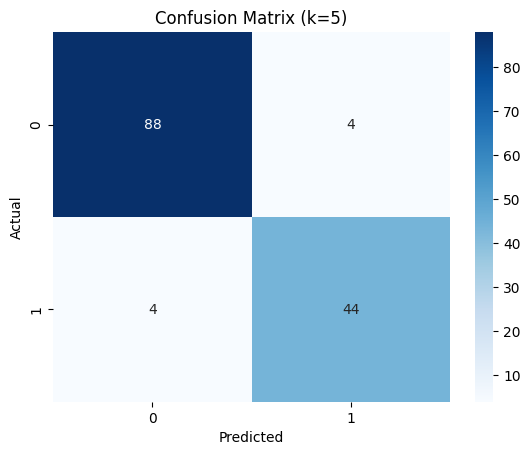

              precision    recall  f1-score   support

           2       0.96      0.96      0.96        92
           4       0.92      0.92      0.92        48

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



In [16]:
# Predictions
y_pred = knn.predict(X_test_scaled)

# Accuracy
print("Training Accuracy:", knn.score(X_train_scaled, y_train))
print("Testing Accuracy :", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (k=5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


**STEP 8: Test for Multiple Values of K**

In [17]:
# Try k = 5 to 10
for k in range(5, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)

    print(f"---- K = {k} ----")
    print("Train Accuracy:", knn.score(X_train_scaled, y_train))
    print("Test Accuracy :", accuracy_score(y_test, y_pred_k))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_k))
    print("\n")


---- K = 5 ----
Train Accuracy: 0.9803220035778175
Test Accuracy : 0.9428571428571428
Confusion Matrix:
[[88  4]
 [ 4 44]]


---- K = 6 ----
Train Accuracy: 0.9749552772808586
Test Accuracy : 0.95
Confusion Matrix:
[[89  3]
 [ 4 44]]


---- K = 7 ----
Train Accuracy: 0.9767441860465116
Test Accuracy : 0.95
Confusion Matrix:
[[88  4]
 [ 3 45]]


---- K = 8 ----
Train Accuracy: 0.9749552772808586
Test Accuracy : 0.9571428571428572
Confusion Matrix:
[[89  3]
 [ 3 45]]


---- K = 9 ----
Train Accuracy: 0.9731663685152058
Test Accuracy : 0.9571428571428572
Confusion Matrix:
[[89  3]
 [ 3 45]]


---- K = 10 ----
Train Accuracy: 0.9749552772808586
Test Accuracy : 0.95
Confusion Matrix:
[[89  3]
 [ 4 44]]




**Optional: Plot Accuracy vs. K**

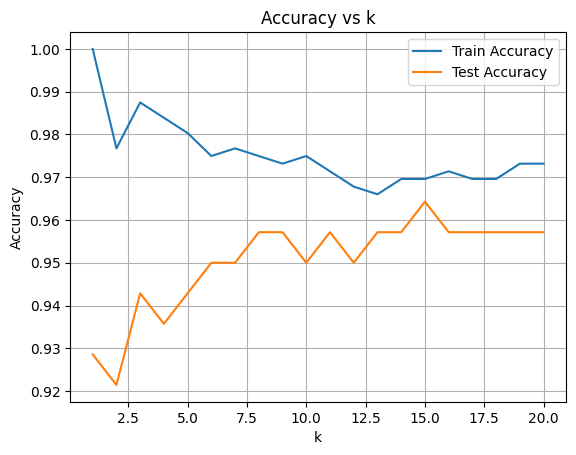

In [18]:
train_accuracies = []
test_accuracies = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracies.append(knn.score(X_train_scaled, y_train))
    test_accuracies.append(knn.score(X_test_scaled, y_test))

plt.plot(k_range, train_accuracies, label='Train Accuracy')
plt.plot(k_range, test_accuracies, label='Test Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.legend()
plt.grid(True)
plt.show()
